In [1]:
import nimfa
import os
import scipy
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from spherecluster import SphericalKMeans
from sklearn.utils import shuffle
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import silhouette_score, confusion_matrix,adjusted_rand_score
from sklearn.preprocessing import scale
import nimfa

In [2]:
datas = np.loadtxt(open("matrice-greyscale-16.csv", "rb"), delimiter=",").T
labels = np.loadtxt(open("labels-8.csv", "rb"), delimiter=",").T

In [ ]:
elbow = []
elbow_score = []
elbow_inertia = []
gaps = []
silhouettes = []

In [ ]:
n_elbow = []
n_elbow_score = []
n_elbow_inertia = []
n_gaps = []
n_silhouettes = []

In [ ]:
K = range(47,58,1)
for k in K:
    print("run : ", k)
    kmeanModel = KMeans(n_clusters=k).fit(datas)
    kmeanModel.fit(datas)
    score = kmeanModel.score(datas)
    n_elbow_score.append(score)
    n_elbow_inertia.append(kmeanModel.inertia_)
    n_elbow.append(sum(np.min(cdist(datas, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / datas.shape[0])
    gap = getGapStat(datas, k, kmeanModel.inertia_)
    n_gaps.append(gap)
    cluster_labels = kmeanModel.predict(datas)
    silhouette_avg = silhouette_score(datas, cluster_labels)
    n_silhouettes.append(silhouette_avg)


In [ ]:
ok = np.concatenate( (n_elbow_score,elbow_score), axis=0 )
plt.figure(figsize=(10, 12))
plt.plot(K, ok, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Score elbow')
plt.show()

In [ ]:
ok = np.concatenate( (n_silhouettes,silhouettes), axis=0 )
plt.figure(figsize=(14, 10))
plt.plot(K, ok, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('sILHOUAETE')
plt.show()

In [ ]:
silhouettes = []

In [ ]:
K = range(1,12)
ok = np.concatenate( (n_gaps,gaps), axis=0 )
plt.figure(figsize=(119, 11))
plt.plot(K, ok, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('gars')
plt.show()

In [ ]:
norm_datas = scale(datas, axis=0, with_std=True)

In [ ]:
599376/(4778*256)

In [ ]:
norm_datas[norm_datas < 0] = 0

In [ ]:
norm_elbow = []
norm_elbow_score = []
norm_elbow_inertia = []
norm_gaps = []
norm_silhouettes = []
K = range(2,50,1)
for k in K:
    print("run : ", k)
    kmeanModel = KMeans(n_clusters=k).fit(datas)
    kmeanModel.fit(datas)
    
    score = kmeanModel.score(datas)
    norm_elbow_score.append(score)
    norm_elbow_inertia.append(kmeanModel.inertia_)
    norm_elbow.append(sum(np.min(cdist(datas, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / datas.shape[0])

    gap = getGapStat(datas, k, kmeanModel.inertia_)
    norm_gaps.append(gap)
    
    cluster_labels = kmeanModel.predict(datas)
    silhouette_avg = silhouette_score(datas, cluster_labels)
    norm_silhouettes.append(silhouette_avg)


In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(K, norm_silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Silhouettes')
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(K, norm_gaps, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Gaps')
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
plt.plot(K, norm_elbow_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow')
plt.show()

### NMF

In [3]:
skm = SphericalKMeans(n_clusters=52)
skm.fit(datas)
_data_dimension, _num_bases = datas.shape
W = np.random.random((_data_dimension, 52))
H = skm.cluster_centers_
nmf = nimfa.Nmf(datas, seed=None, max_iter=2000, H=H, W=W)
nmf_skmeans = nmf()

In [11]:
def display_matrix(X, row=None, size=16):
    X_data = np.array([])
    if row is None:
        row = sqrt(len(X))
    for x in X:
        arr = x.reshape(size,size)
        if X_data.any() :
            X_data = np.concatenate( (X_data, arr), axis=1 )
        else:
            X_data = arr
    n = np.array_split(X_data, row, axis=1)
    X_data = np.concatenate(n, axis=1)
    plt.figure(figsize=(50, 50))
    plt.imshow(X_data, interpolation="nearest", cmap=plt.get_cmap('gray'))
    plt.axis("off")
    plt.show()

In [7]:
a = nmf.fitted()

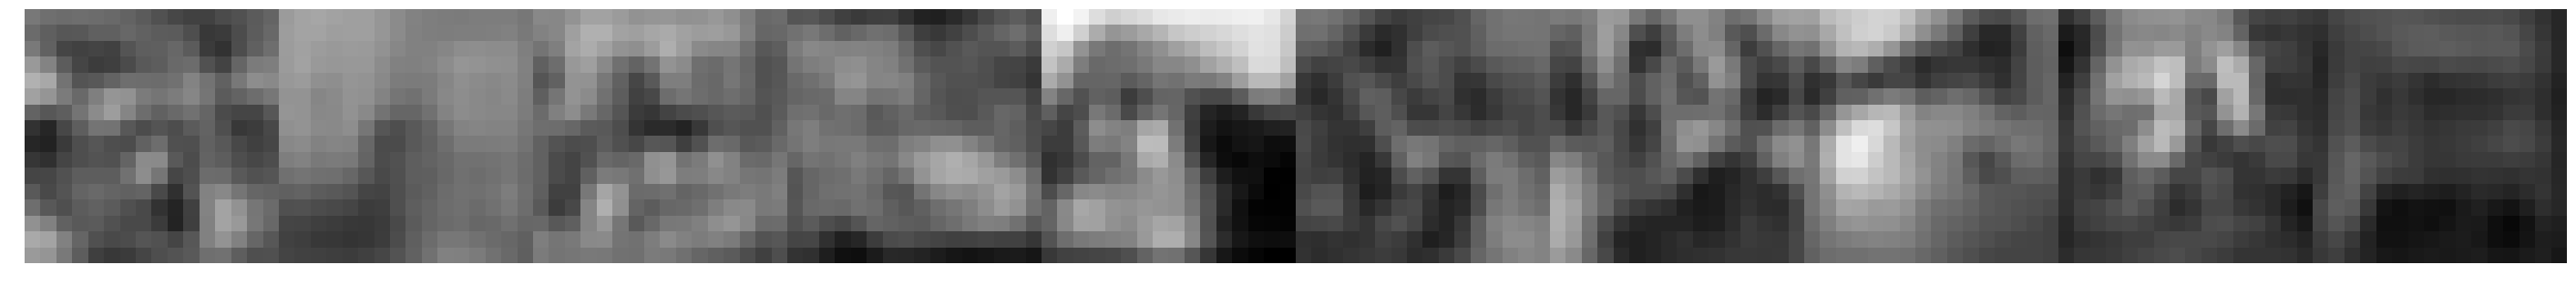

In [16]:
display_matrix(a.T[0:10],row=4)

In [ ]:
W = nmf_skmeans.basis()

In [ ]:
cat = np.array(np.argmax(W, axis=1))

In [ ]:
confusion_matrix(labels, cat.T[0])

In [ ]:
np.mean(labels == cat.T[0])  

In [ ]:
adjusted_rand_score(labels, cat.T[0])

In [ ]:
n_run

In [3]:
res={}
for x in range(47,58):
    print("run ", x)
    nmf = nimfa.Nmf(datas, seed="random_vcol", max_iter=2000, rank=x)
    nmf_skmeans = nmf()
    res[x] = nmf_skmeans.summary()

run  47
run  48
run  49
run  50


MemoryError: 

In [ ]:
def getGapStat(data, k, origDisp, nrefs=3):
    refDisps = np.zeros(nrefs)
    for i in range(nrefs):  
        # Create new random reference set
        randomReference = np.random.random_sample(size=data.shape)

        # Fit to it
        km = KMeans(k)
        km.fit(randomReference)

        refDisp = km.inertia_
        refDisps[i] = refDisp
    gap = np.log(np.mean(refDisps)) - np.log(origDisp)
    return gap